Testing the difference between differend algorithms

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading data

In [2]:
SAVE_EVOL_FILE = 'results/run1/test_GA_save.csv'
SAVE_PSO_FILE = 'results/run2/test_PSO_save.csv'
SAVE_RND_FILE = 'results/run1/test_RND_save.csv'

In [3]:
evol_data = pd.read_csv(SAVE_EVOL_FILE)
pso_data = pd.read_csv(SAVE_PSO_FILE)
rnd_data = pd.read_csv(SAVE_RND_FILE)

Text(0.5, 1.0, 'Random Search')

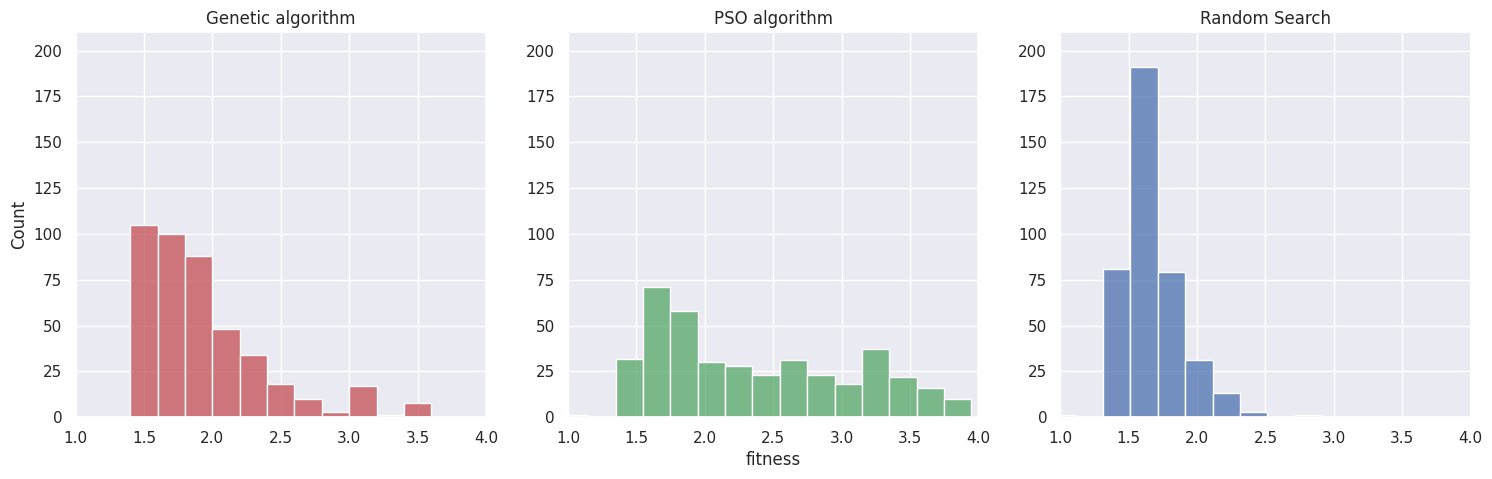

In [26]:

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(evol_data['fitness'], ax=ax[0], binwidth=0.2, color='r')
sns.histplot(pso_data['fitness'], ax=ax[1], binwidth=0.2, color='g')
sns.histplot(rnd_data['fitness'], ax=ax[2], binwidth=0.2, color='b')

for a in ax:
    a.set_xlim(1, 4)
    a.set_ylim(0, 210)
    if a != ax[1]:
        a.set_xlabel('')
    if a != ax[0]:
        a.set_ylabel('')

ax[0].set_title('Genetic algorithm')
ax[1].set_title('PSO algorithm')
ax[2].set_title('Random Search')
